In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
gs_data = pdr.get_data_fred('GS10')
gs_data.head()

,GS10
DATE,
2019-11-01,1.81
2019-12-01,1.86
2020-01-01,1.76
2020-02-01,1.50
2020-03-01,0.87


## Simple Moving Average (SMV)

In [3]:
gs_data["GS10:10 days rolling"] = gs_data["GS10"].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='DATE'>

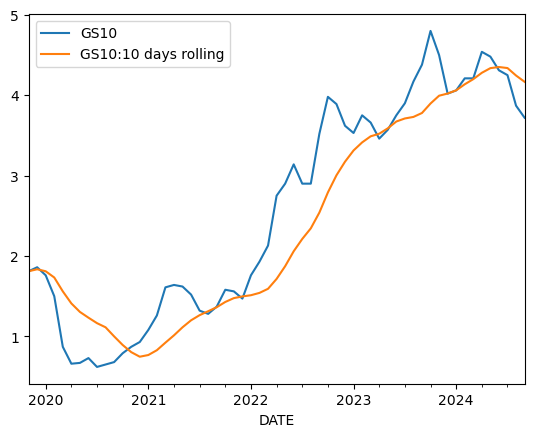

In [4]:
gs_data[['GS10','GS10:10 days rolling']].plot()

In [5]:
gs_data["GS10:30 days rolling"] = gs_data["GS10"].rolling(window=30,min_periods=1).mean()
gs_data["GS10:50 days rolling"] = gs_data["GS10"].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='DATE'>

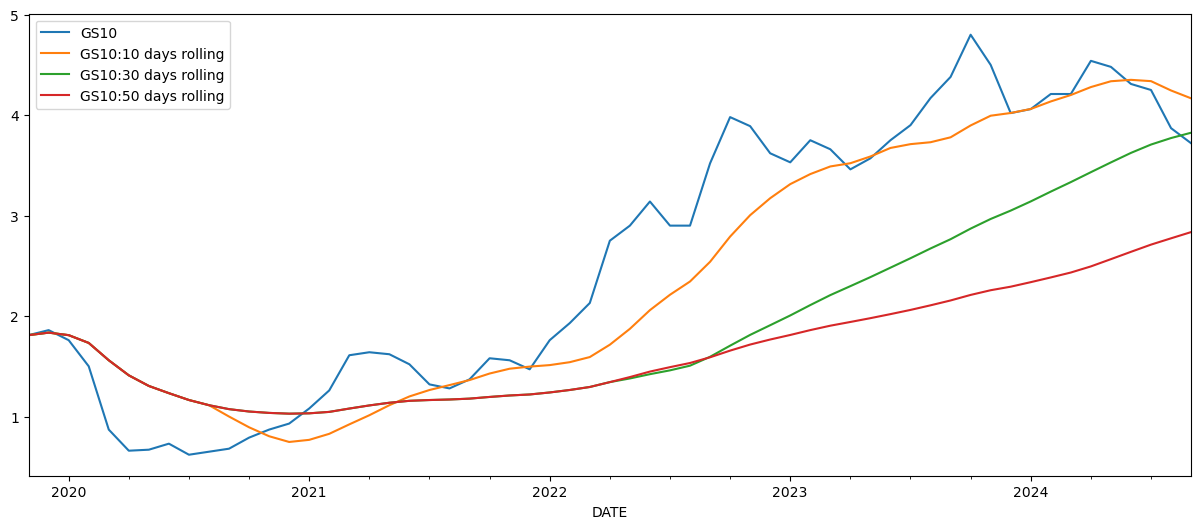

In [6]:
gs_data[['GS10','GS10:10 days rolling','GS10:30 days rolling','GS10:50 days rolling']].plot(figsize=(15,6))

## Cumulative Moving Average (CMA)

<Axes: xlabel='DATE'>

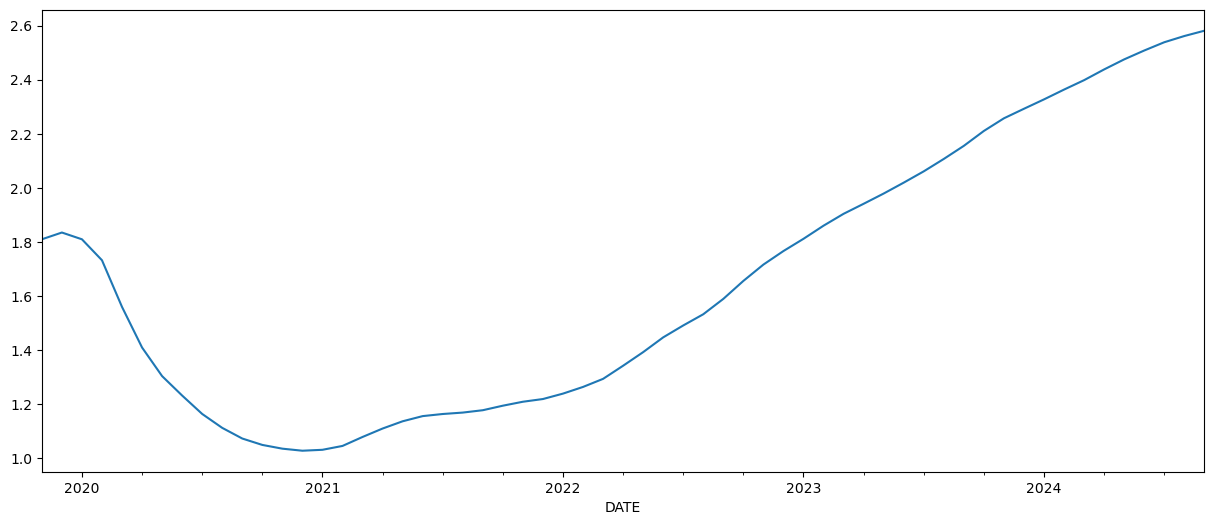

In [7]:
gs_data["GS10"].expanding().mean().plot(figsize=(15,6))

## Exponential Moving Average (EMV)

In [8]:
# smoothing without lags
# Let's smoothing factor is 0.1
gs_data["ewma_0.1"] = gs_data["GS10"].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='DATE'>

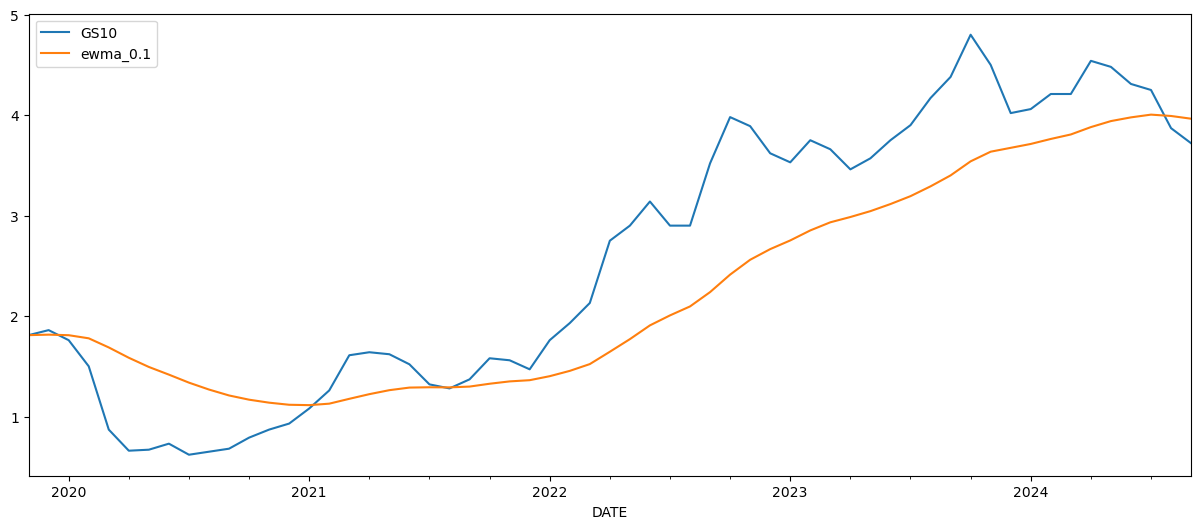

In [9]:
gs_data[['GS10','ewma_0.1']].plot(figsize=(15,6))

In [10]:
gs_data["ewma_5days"] = gs_data["GS10"].ewm(span=5).mean()

<Axes: xlabel='DATE'>

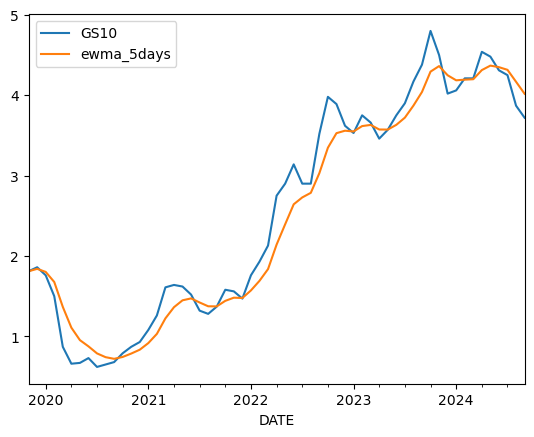

In [11]:
gs_data[["GS10","ewma_5days"]].plot()